In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization

import cv2

In [2]:
macbook_BGR = cv2.imread('./macbook_image.jpg')
macbook_RGB = cv2.cvtColor(macbook_BGR,cv2.COLOR_BGR2RGB)

In [3]:
macbook_RGB.shape

(1512, 2688, 3)

In [4]:
def display_image(image,cmap=None,figsize=(20,12)):
    plt.figure(figsize=figsize)
    plt.imshow(image,cmap=cmap)

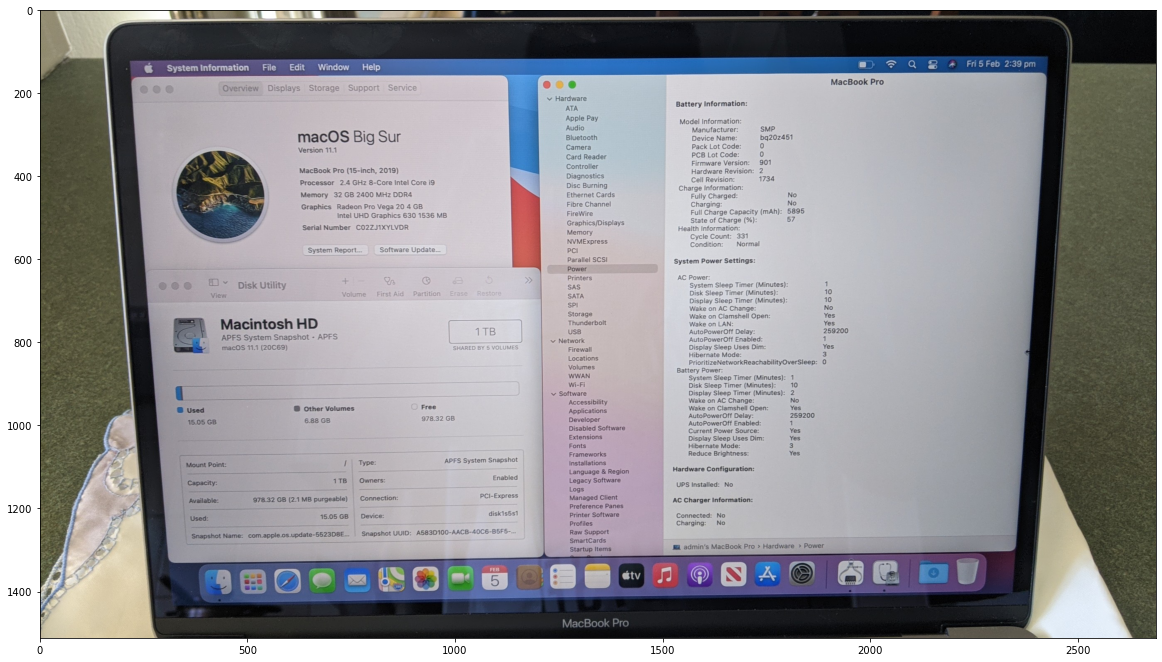

In [6]:
display_image(macbook_RGB)

In [7]:
macbook_gray = cv2.cvtColor(macbook_RGB,cv2.COLOR_RGB2GRAY)

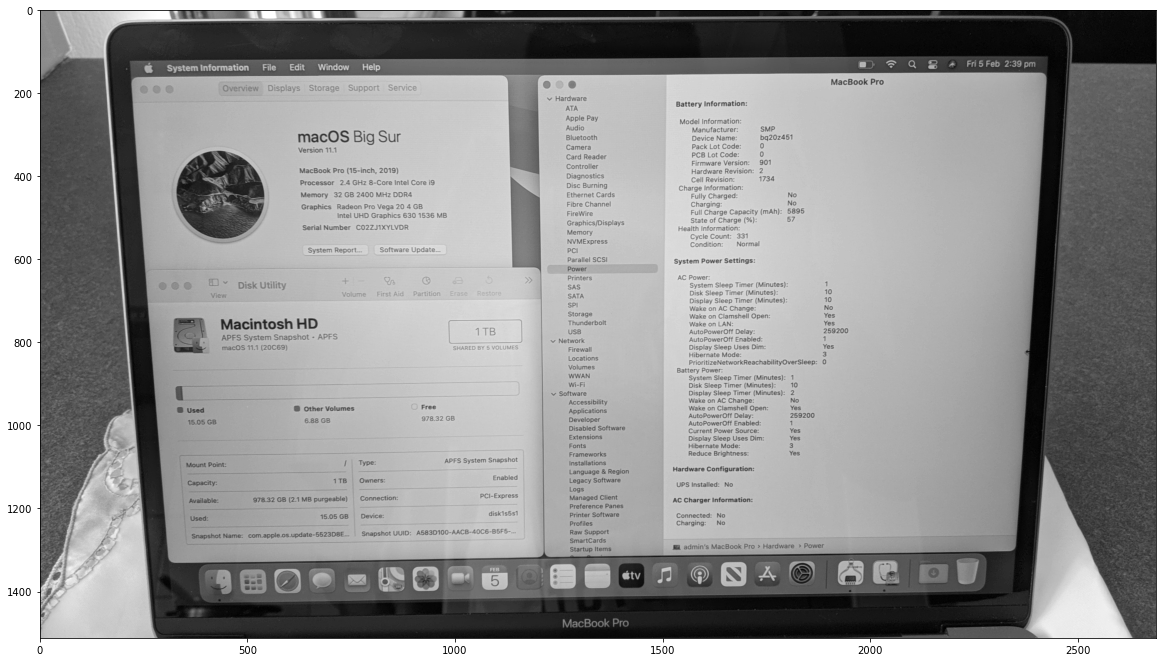

In [8]:
display_image(macbook_gray,cmap='gray')

In [9]:
# Threshold image
ret, macbook_thresholded_binary = cv2.threshold(macbook_gray,127,255,cv2.THRESH_BINARY_INV)

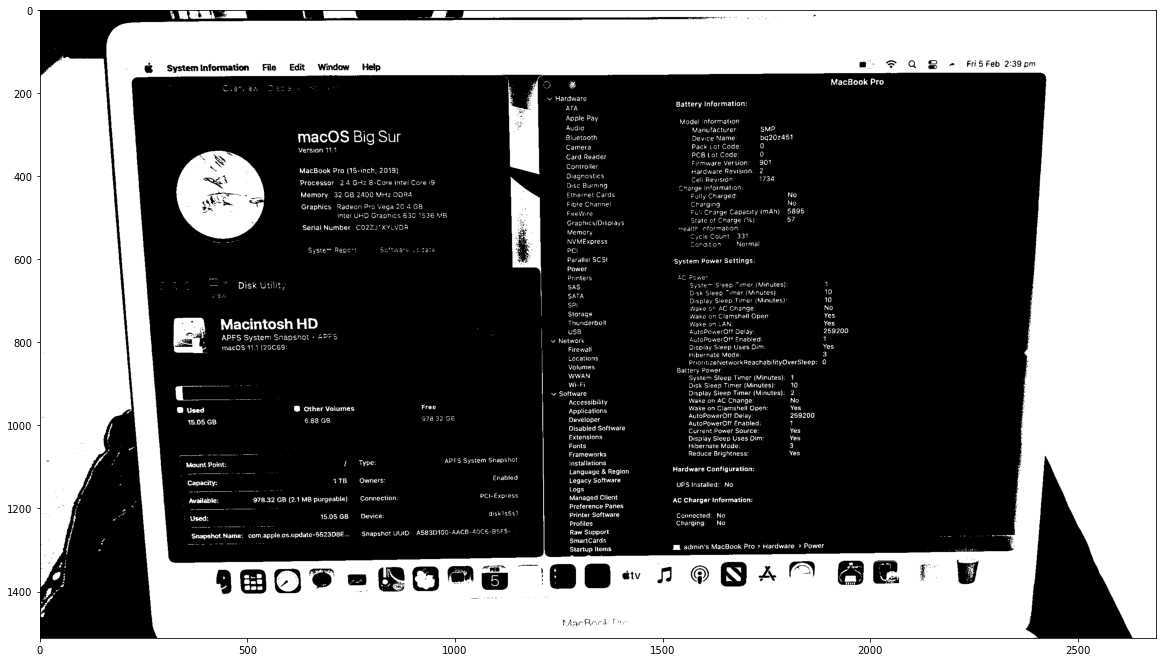

In [10]:
display_image(macbook_thresholded_binary,'gray')

In [11]:
macbook_thresholded_adaptive = cv2.adaptiveThreshold(macbook_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,8) # Play around with these last 2 numbers

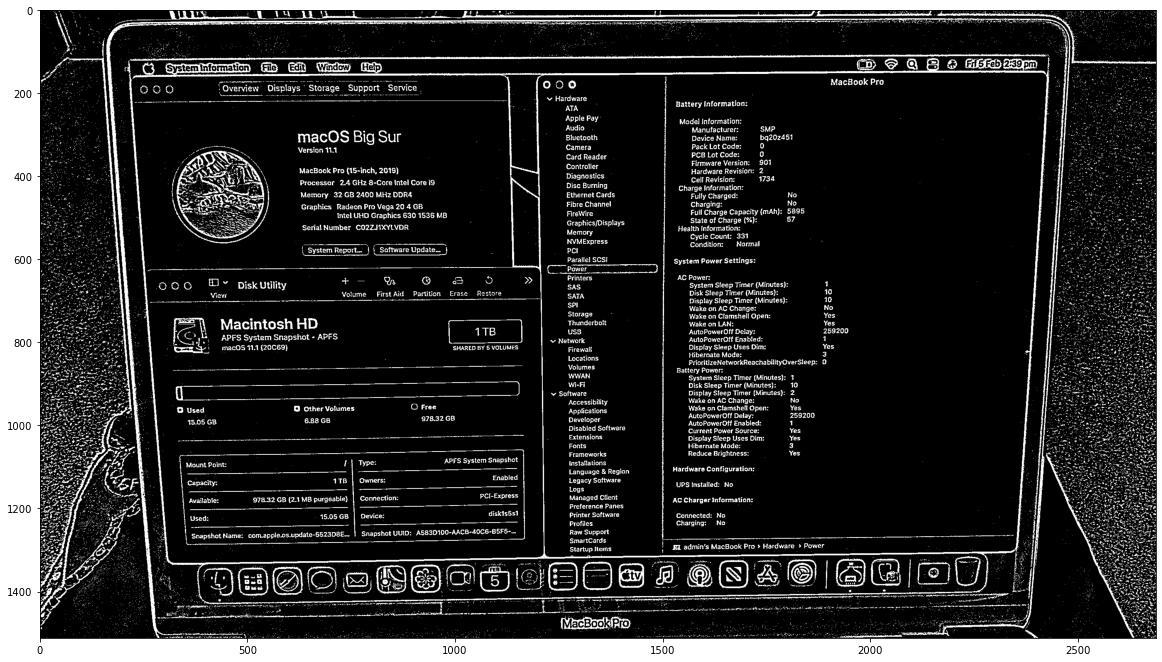

In [12]:
display_image(macbook_thresholded_adaptive,'gray')

In [13]:
macbook_thresholded_adaptive.shape

(1512, 2688)

In [18]:
kernel = np.ones((2,2),np.uint8)
macbook_thresholded_adaptive_opening = cv2.morphologyEx(macbook_thresholded_adaptive, cv2.MORPH_OPEN, kernel)

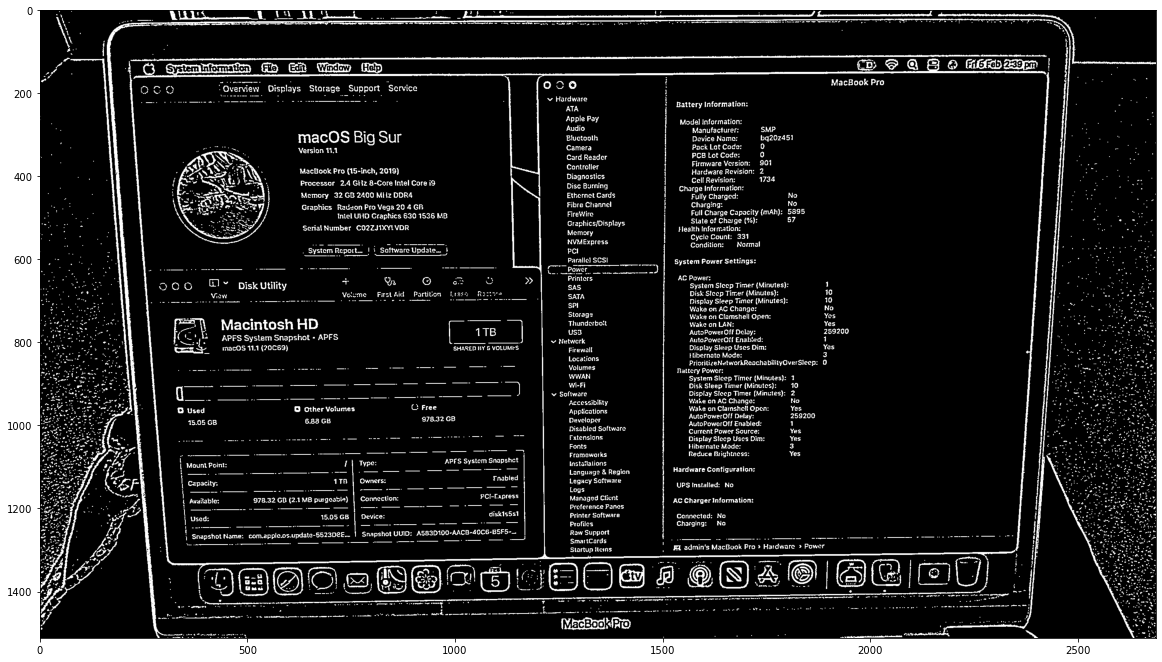

In [19]:
display_image(macbook_thresholded_adaptive_opening,'gray')

In [20]:
sobelx = cv2.Sobel(macbook_gray,cv2.CV_64F,1,0,ksize=5)



In [21]:
sobely = cv2.Sobel(macbook_gray,cv2.CV_64F,0,1,ksize=5)

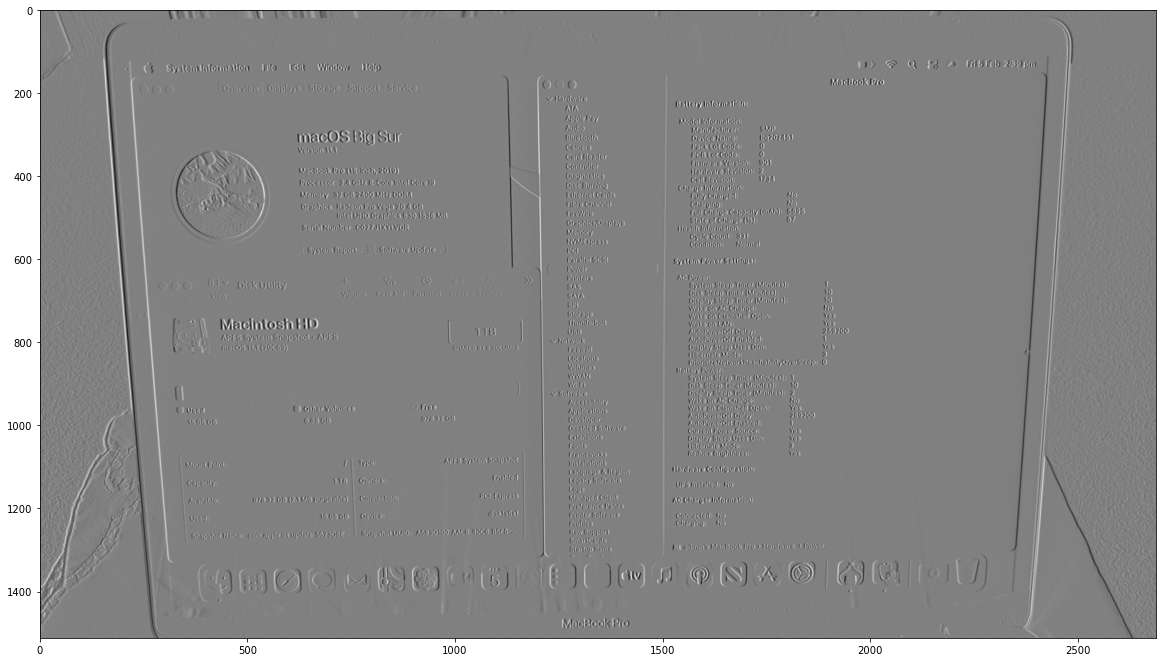

In [22]:
display_image(sobelx,'gray')

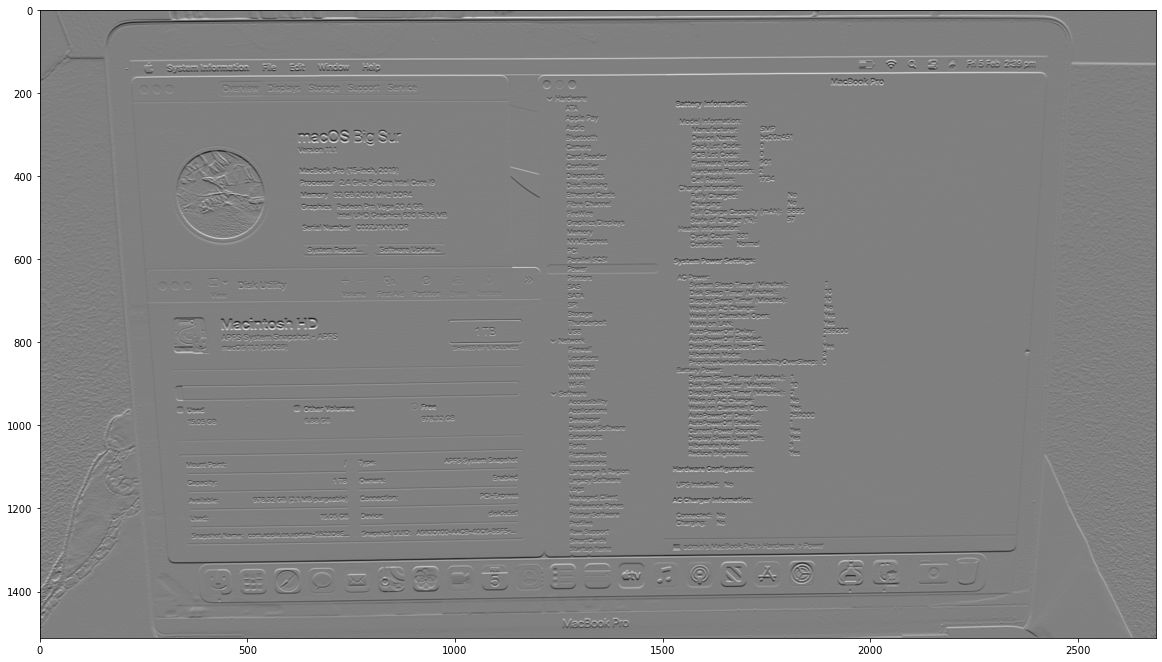

In [23]:
display_image(sobely,'gray')

In [24]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)

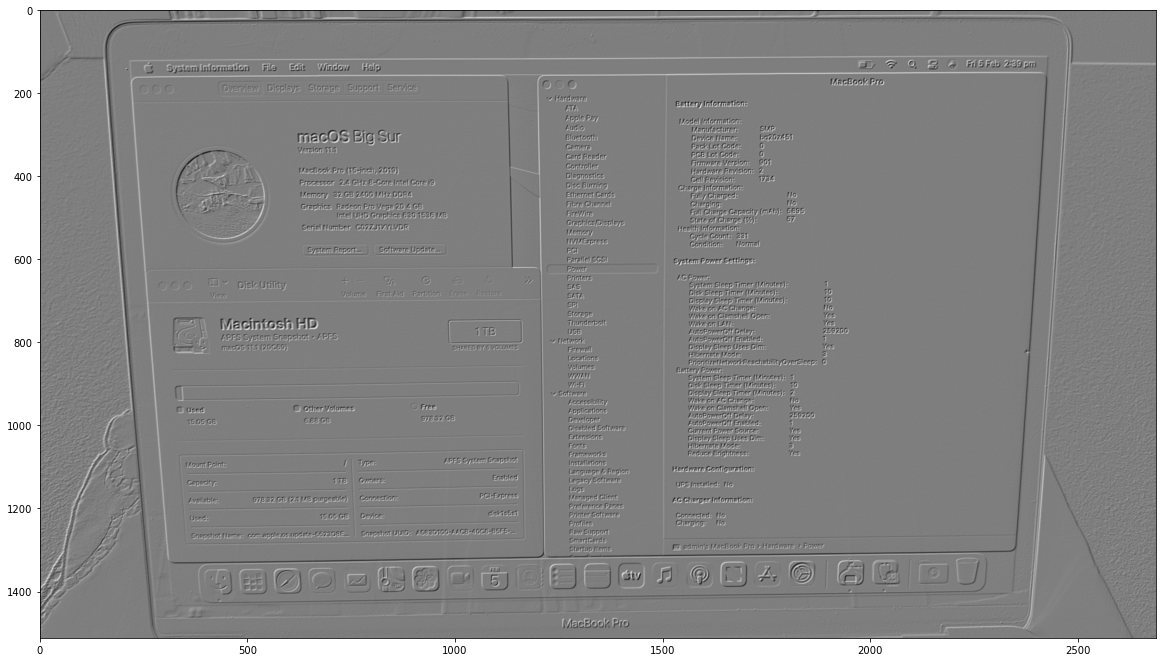

In [25]:
display_image(blended,'gray')

In [27]:
blended = blended / blended.max()

In [28]:
blended

array([[ 0.        , -0.0002076 ,  0.00311397, ..., -0.01806103,
         0.02055221,  0.        ],
       [-0.0110027 , -0.00685074,  0.00062279, ..., -0.03653726,
         0.00685074, -0.01370147],
       [ 0.00228358,  0.00560515,  0.00747353, ...,  0.00394436,
         0.0220054 , -0.00332157],
       ...,
       [ 0.00685074,  0.00975711,  0.00352917, ...,  0.03632967,
         0.02927133,  0.02761055],
       [-0.00207598,  0.0002076 ,  0.00332157, ..., -0.00788873,
        -0.02844094, -0.04027403],
       [ 0.        ,  0.00228358,  0.00602034, ...,  0.01224829,
         0.00954951,  0.        ]])

In [30]:
kernel = np.ones((5,5),np.uint8)

In [31]:
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

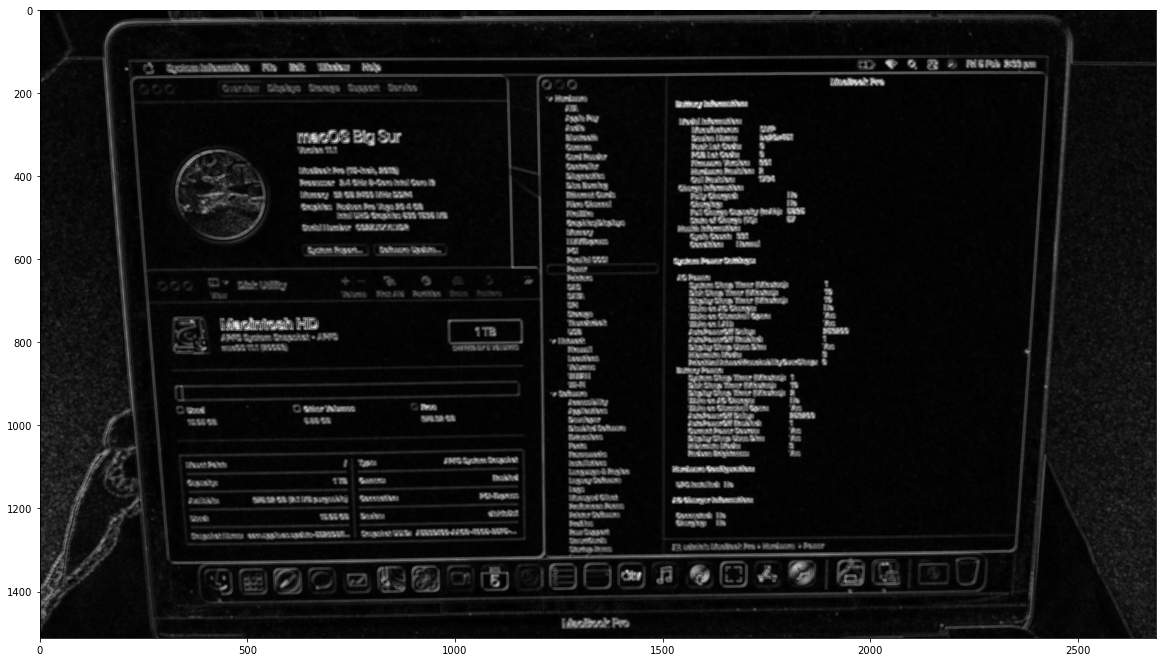

In [32]:
display_image(gradient,'gray')

In [33]:
range(0,macbook_thresholded_adaptive.shape[0],28)

range(0, 1512, 28)

In [34]:
max_height = macbook_thresholded_adaptive.shape[0]
max_width = macbook_thresholded_adaptive.shape[1]
img_chunks = []

img_chunk_height = 14
img_chunk_width = 14 

for height in range(0,max_height,img_chunk_height):
    for width in range(0,max_width,img_chunk_width):
        image_chunk = macbook_thresholded_adaptive[height:height+img_chunk_height,width:width+img_chunk_width]
        img_chunks.append(image_chunk)

In [35]:
len(img_chunks)

20736

In [36]:
macbook_thresholded_adaptive.shape

(1512, 2688)

In [37]:
macbook_thresholded_adaptive.min()

0

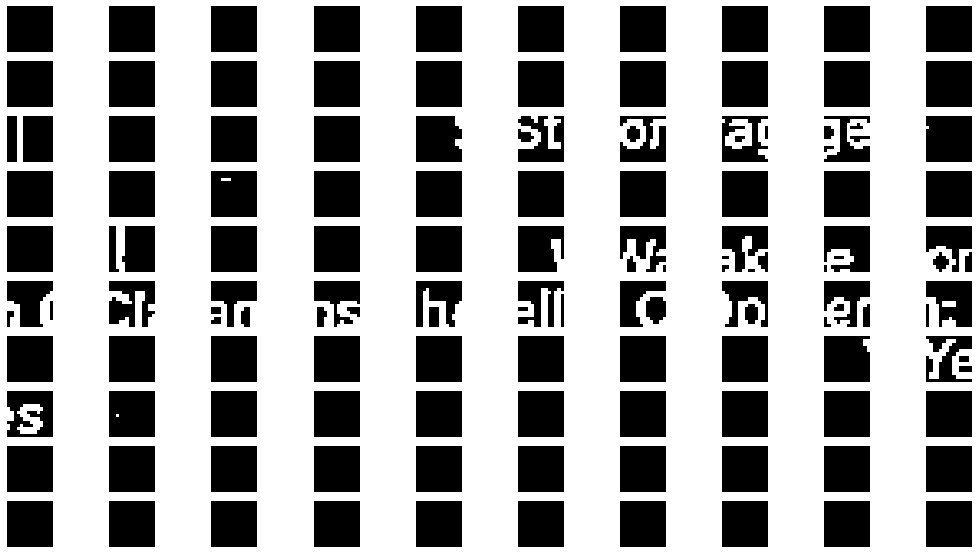

In [38]:
fig = plt.figure(figsize=(18,15))
minrange,maxrange = 10050,10150
for index in range(minrange,maxrange):
    plotIndex = index - minrange 
    fig.add_subplot(15,10,plotIndex+1) 
    single_image = img_chunks[index].copy()
    plt.axis('off')
    plt.imshow(single_image,cmap='gray')

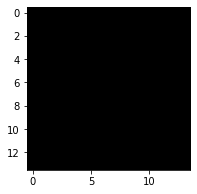

In [39]:
display_image(single_image,'gray',figsize=(3,3))